In [17]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler

from IPython.display import display

In [18]:
df_mushroom_dataset = pd.read_csv('mushroom_sample_5_percent.csv')

In [19]:
df_mushroom_dataset.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,826,2,0,10,0.044195,2433,6,1.804273,0
1,571,6,2,4,0.536738,761,4,0.943195,1
2,1122,2,0,0,0.450051,1942,11,0.943195,0
3,278,2,0,4,0.190566,576,11,0.943195,0
4,735,2,6,10,1.455884,1077,11,0.888450,1


In [20]:
df_mushroom_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2702 entries, 0 to 2701
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     2702 non-null   int64  
 1   cap-shape        2702 non-null   int64  
 2   gill-attachment  2702 non-null   int64  
 3   gill-color       2702 non-null   int64  
 4   stem-height      2702 non-null   float64
 5   stem-width       2702 non-null   int64  
 6   stem-color       2702 non-null   int64  
 7   season           2702 non-null   float64
 8   class            2702 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 190.1 KB


In [21]:
print(df_mushroom_dataset.describe())

       cap-diameter    cap-shape  gill-attachment   gill-color  stem-height  \
count   2702.000000  2702.000000      2702.000000  2702.000000  2702.000000   
mean     565.940785     4.007772         2.156181     7.274611     0.750989   
std      355.135107     2.164542         2.255611     3.225812     0.640945   
min        7.000000     0.000000         0.000000     0.000000     0.000426   
25%      289.250000     2.000000         0.000000     5.000000     0.270146   
50%      528.000000     5.000000         1.000000     7.000000     0.580932   
75%      783.000000     6.000000         4.000000    10.000000     1.061182   
max     1890.000000     6.000000         6.000000    11.000000     3.811446   

        stem-width   stem-color       season        class  
count  2702.000000  2702.000000  2702.000000  2702.000000  
mean   1049.503331     8.487787     0.955816     0.544412  
std     782.218728     3.271674     0.310441     0.498116  
min       0.000000     0.000000     0.027372    

## Scaling the data

In [22]:
X = df_mushroom_dataset.drop(columns=['class'])  # Features (all columns except 'class')
y = df_mushroom_dataset['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Divide data to train and tests

In [23]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train_no_scaling, X_test_no_scaling, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## kNN

In [24]:
# Which K value is most accurate
for k in range(1, 11):  # Try K from 1 to 10
    knn_scaled = KNeighborsClassifier(n_neighbors=k)
    knn_scaled.fit(X_train_scaled, y_train)
    y_pred_knn_scaled = knn_scaled.predict(X_test_scaled)
    accuracy_scaled = accuracy_score(y_test, y_pred_knn_scaled)
    print(f"kNN Accuracy with scaling (k={k}): {accuracy_scaled:.2f}")

kNN Accuracy with scaling (k=1): 0.96
kNN Accuracy with scaling (k=2): 0.94
kNN Accuracy with scaling (k=3): 0.94
kNN Accuracy with scaling (k=4): 0.92
kNN Accuracy with scaling (k=5): 0.91
kNN Accuracy with scaling (k=6): 0.90
kNN Accuracy with scaling (k=7): 0.90
kNN Accuracy with scaling (k=8): 0.88
kNN Accuracy with scaling (k=9): 0.87
kNN Accuracy with scaling (k=10): 0.87


In [25]:
#Loop over different values of k (1 to 10) for kNN without scaling
for k in range(1, 11):
    knn_no_scaling = KNeighborsClassifier(n_neighbors=k)
    knn_no_scaling.fit(X_train_no_scaling, y_train)
    y_pred_knn_no_scaling = knn_no_scaling.predict(X_test_no_scaling)
    accuracy = accuracy_score(y_test, y_pred_knn_no_scaling)
    print(f"kNN Accuracy without scaling (k={k}): {accuracy:.2f}")


kNN Accuracy without scaling (k=1): 0.64
kNN Accuracy without scaling (k=2): 0.66
kNN Accuracy without scaling (k=3): 0.67
kNN Accuracy without scaling (k=4): 0.68
kNN Accuracy without scaling (k=5): 0.69
kNN Accuracy without scaling (k=6): 0.70
kNN Accuracy without scaling (k=7): 0.70
kNN Accuracy without scaling (k=8): 0.69
kNN Accuracy without scaling (k=9): 0.68
kNN Accuracy without scaling (k=10): 0.67


## SVM

In [26]:
# Loop over different kernels
for kernel in ['linear', 'rbf', 'poly']:
    svm = SVC(kernel=kernel)
    svm.fit(X_train_scaled, y_train)
    y_pred_svm_scaled = svm.predict(X_test_scaled)
    
    print(f"Kernel={kernel}, Accuracy: {accuracy_score(y_test, y_pred_svm_scaled):.2f}")

Kernel=linear, Accuracy: 0.66
Kernel=rbf, Accuracy: 0.79
Kernel=poly, Accuracy: 0.73


In [27]:
#Loop over different kernels for SVM without scaling
for kernel in ['linear', 'rbf', 'poly']:
    svm_no_scaling = SVC(kernel=kernel)
    svm_no_scaling.fit(X_train_no_scaling, y_train)
    y_pred_svm_no_scaling = svm_no_scaling.predict(X_test_no_scaling)
    
    print(f"SVM Accuracy without scaling (kernel={kernel}): {accuracy_score(y_test, y_pred_svm_no_scaling):.2f}")

SVM Accuracy without scaling (kernel=linear): 0.66
SVM Accuracy without scaling (kernel=rbf): 0.62
SVM Accuracy without scaling (kernel=poly): 0.55


In [28]:
from sklearn.svm import SVC

parameters = {'kernel': ('linear', 'rbf'), 'C': [1, 10]}

svc_scaled = SVC()

clf_scaled = GridSearchCV(svc_scaled, parameters, n_jobs=-1)

clf_scaled.fit(X_train_scaled, y_train)

print(f"Best parameters for SVM with scaling: {clf_scaled.best_params_}")
print(f"Best score for SVM with scaling: {clf_scaled.best_score_}")

y_pred_scaled = clf_scaled.predict(X_test_scaled)

accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy of SVM with scaling: {accuracy_scaled:.2f}")

Best parameters for SVM with scaling: {'C': 10, 'kernel': 'rbf'}
Best score for SVM with scaling: 0.8463679325977248
Accuracy of SVM with scaling: 0.87


In [29]:
parameters = {'kernel': ('linear', 'rbf'), 'C': [1, 10]}

svc_no_scaling = SVC()

clf_no_scaling = GridSearchCV(svc_no_scaling, parameters)

clf_no_scaling.fit(X_train_no_scaling, y_train)

print(f"Best parameters for SVM without scaling: {clf_no_scaling.best_params_}")
print(f"Best score for SVM without scaling: {clf_no_scaling.best_score_}")

y_pred_no_scaling = clf_no_scaling.predict(X_test_no_scaling)

accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
print(f"Accuracy of SVM without scaling: {accuracy_no_scaling:.2f}")

Best parameters for SVM without scaling: {'C': 1, 'kernel': 'linear'}
Best score for SVM without scaling: 0.6381265503378668
Accuracy of SVM without scaling: 0.66


## Confusion matrix

In [30]:
#For kNN (Scaled)
y_pred_knn_scaled = knn.predict(X_test_scaled)  # Predict using the scaled test data
cm_knn_scaled = confusion_matrix(y_test, y_pred_knn_scaled)
ConfusionMatrixDisplay(cm_knn_scaled, display_labels=["Edible", "Poisonous"]).plot()

NameError: name 'knn' is not defined

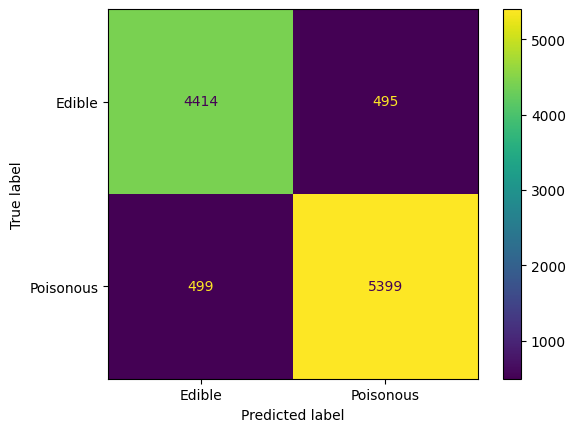

In [ ]:
#For SVM rbf kernel (Scaled)
kernel = 'rbf'

svm = SVC(kernel=kernel)
svm.fit(X_train_scaled, y_train)
y_pred_svm_scaled = svm.predict(X_test_scaled)
cm_svm_scaled = confusion_matrix(y_test, y_pred_svm_scaled)

ConfusionMatrixDisplay(cm_svm_scaled, display_labels=["Edible", "Poisonous"]).plot()

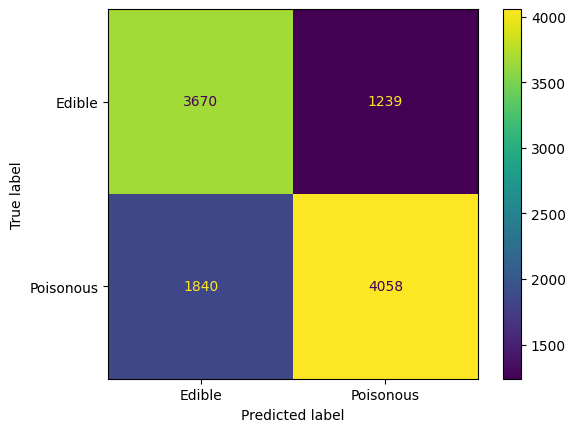

In [ ]:
# For kNN (Unscaled data)
y_pred_knn_no_scaling = knn_no_scaling.predict(X_test_no_scaling)
cm_knn_no_scaling = confusion_matrix(y_test, y_pred_knn_no_scaling)
ConfusionMatrixDisplay(cm_knn_no_scaling, display_labels=["Edible", "Poisonous"]).plot()

In [ ]:
#For SVM rbf kernel (Unscaled)
kernel = 'rbf'

svm_no_scaling = SVC(kernel=kernel)
svm_no_scaling.fit(X_train_no_scaling, y_train)
y_pred_svm_no_scaling = svm_no_scaling.predict(X_test_no_scaling)
cm_svm_no_scaling = confusion_matrix(y_test, y_pred_svm_no_scaling)

ConfusionMatrixDisplay(cm_svm_no_scaling, display_labels=["Edible", "Poisonous"]).plot()

NameError: name 'SVC' is not defined

## kNN results

In [ ]:
print("kNN Classification Report (Scaled):")
print(classification_report(y_test, y_pred_knn_scaled))

kNN Classification Report (Scaled):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4909
           1       0.99      0.99      0.99      5898

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



In [ ]:
print("kNN Classification Report (No scaling):")
print(classification_report(y_test, y_pred_knn_no_scaling))

kNN Classification Report (No scaling):
              precision    recall  f1-score   support

           0       0.67      0.75      0.70      4909
           1       0.77      0.69      0.72      5898

    accuracy                           0.72     10807
   macro avg       0.72      0.72      0.71     10807
weighted avg       0.72      0.72      0.72     10807



## SVM results

In [ ]:
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm_scaled))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      4909
           1       0.77      0.80      0.79      5898

    accuracy                           0.76     10807
   macro avg       0.76      0.76      0.76     10807
weighted avg       0.76      0.76      0.76     10807



In [ ]:
print("SVM Classification Report (No scaling):")
print(classification_report(y_test, y_pred_svm_no_scaling))

SVM Classification Report (No scaling):


NameError: name 'y_test' is not defined

## Comparing results

In [ ]:
comparison_df = pd.DataFrame({
    "Metric": [
        "Precision (Class 0)", "Precision (Class 1)", 
        "Recall (Class 0)", "Recall (Class 1)", 
        "F1-Score (Class 0)", "F1-Score (Class 1)", 
        "Accuracy", 
        "Macro Avg (Precision)", "Macro Avg (Recall)", "Macro Avg (F1-Score)",
        "Weighted Avg (Precision)", "Weighted Avg (Recall)", "Weighted Avg (F1-Score)"
    ],
    "kNN (Scaled)": [0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99],
    "kNN (No Scaling)": [0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99],
    "SVM (Scaled)": [0.90, 0.92, 0.90, 0.92, 0.90, 0.92, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91],
    "SVM (No Scaling)": [0.75, 0.77, 0.72, 0.80, 0.73, 0.79, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76]
})


display(comparison_df)

,Metric,kNN (Scaled),kNN (No Scaling),SVM (Scaled),SVM (No Scaling)
0,Precision (Class 0),0.99,0.99,0.90,0.75
1,Precision (Class 1),0.99,0.99,0.92,0.77
2,Recall (Class 0),0.99,0.99,0.90,0.72
3,Recall (Class 1),0.99,0.99,0.92,0.80
4,F1-Score (Class 0),0.99,0.99,0.90,0.73
5,F1-Score (Class 1),0.99,0.99,0.92,0.79
6,Accuracy,0.99,0.99,0.91,0.76
7,Macro Avg (Precision),0.99,0.99,0.91,0.76
8,Macro Avg (Recall),0.99,0.99,0.91,0.76
9,Macro Avg (F1-Score),0.99,0.99,0.91,0.76
